<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/bag_7_Pandas_Data_Preprocessing_ilham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
diabetes_df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header=None) # nama kolom jangan dibaca

diabetes_df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# ubah nilai data 0 menjadi NA/Not Available
diabetes_df[diabetes_df.columns[:8]]= diabetes_df[diabetes_df.columns[:8]].replace(0, np.nan)

In [ ]:
diabetes_df.columns = ["Num of Times Pregnant",
                       "Plasma Glucose",
                       "Diastolic blood Pressure",
                       "Triceps skinfold thickness",
                       "2-Hour serum insulin",
                       "BMI",
                       "Diabetes Pedigree Function",
                       "Age","Class"]

In [ ]:
# hitung jumlah data kosong/NA
diabetes_df.isnull().sum()

Num of Times Pregnant         111
Plasma Glucose                  5
Diastolic blood Pressure       35
Triceps skinfold thickness    227
2-Hour serum insulin          374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Class                           0
dtype: int64

In [ ]:
# imputation (pengisian nilai pada data kosong)
from sklearn.impute import SimpleImputer

# buat object untuk mean, median , mode
mean_imputer = SimpleImputer(missing_values=np.nan,
                             strategy="mean")

median_imputer = SimpleImputer(missing_values=np.nan,
                               strategy="median")

most_frequent_imputer = SimpleImputer(missing_values=np.nan,
                               strategy="most_frequent")

<Axes: xlabel='Class', ylabel='2-Hour serum insulin'>

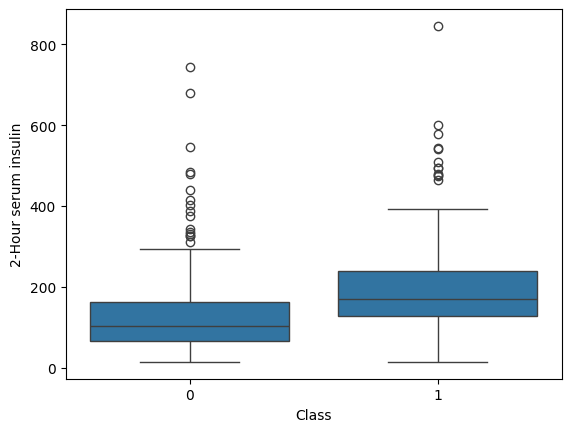

In [ ]:
# cek apakah kolom insulin ada outlier

import seaborn as sns
sns.boxplot(x = diabetes_df["Class"],
            y = diabetes_df["2-Hour serum insulin"])

In [ ]:
# Isi khusus untuk kolom insulin yang data kosong
insulin_imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")

insulin_imputer = insulin_imputer.fit(diabetes_df[["2-Hour serum insulin"]])

diabetes_df[["2-Hour serum insulin"]] = insulin_imputer.transform(diabetes_df[["2-Hour serum insulin"]])

In [ ]:
diabetes_df.isnull().sum()

Num of Times Pregnant         111
Plasma Glucose                  5
Diastolic blood Pressure       35
Triceps skinfold thickness    227
2-Hour serum insulin            0
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Class                           0
dtype: int64

In [ ]:
# Imputation ke semua
X = diabetes_df.iloc[:,:8].values
y = diabetes_df.iloc[:,8].values

# Imputation

y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
X = median_imputer.fit_transform(X)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# Imbalance Data Handling

In [ ]:
# SMOTE
df = pd.read_csv("/content/stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [ ]:
df = df.drop(["id", "gender", "ever_married","work_type", "Residence_type",
              "smoking_status"], axis = 1)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [ ]:
X = df.iloc[:,:-1].values
y = df["stroke"].values

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# object SMOTE
smote = SMOTE(random_state=42,
              sampling_strategy="minority") # tentukan kelas mana yang akan diperbanyak

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# aplikasi SMOTING pada Data Training
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Dengan begitu data menjadi seimbang
smote

SMOTE(random_state=42, sampling_strategy='minority')

# Data Scaling

- Normalization : mengubah data menjadi jangkauan spesifik biasanya 0-1
(KNN, Clustering, Neural Networks, Image Preprocessing)


- Standardization : mengubah data menjadi skala umum, biasanya dengan mean/rata rata = 0 dan standar diviasi 1 biasanya data dianggap terdistribusi normal
(PCA,SVM, Linear Regression, Gradient Descent Optimization)

In [ ]:
# MinMAXScaler -> Normalization
# StandardScaler -> Standardization/scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
data = np.asarray([[8, 10],
                   [15, 54],
                   [89, 1],
                   [77, 32],
                   [15, 19]])

In [ ]:
# Normalization -> range 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.        , 0.16981132],
       [0.08641975, 1.        ],
       [1.        , 0.        ],
       [0.85185185, 0.58490566],
       [0.08641975, 0.33962264]])

In [ ]:
# standardization
standard_scaler = StandardScaler()
standard_data = standard_scaler.fit_transform(data)
standard_data

array([[-0.94365146, -0.71360735],
       [-0.74226243,  1.66508381],
       [ 1.38670733, -1.20015781],
       [ 1.04146899,  0.47573823],
       [-0.74226243, -0.22705688]])

# Categorical Encoding - ubah data categorical menjadi format numeric

- Label Encoding : mengubah data category yang bisa diurutkan menjadi angka
Misalkan :

tingkat pendidikan
SD,SMP,SMA, S1, S2,S3 -> 1,2,3,4,5,6

Tingkat Kepuasan
Kecewa, kurang, biasa saja, puas, sangat puas -> 1,2,3,4,5

- One Hot Encoding : Mengubah data category menjadi format matrix khusus untuk data yang tidak bisa diurutkan misalkan:

Nama Merek Mobil : Toyota, Suzuki, Daihatsu, Wuling
Nama Merek Kopi : Kapal Api, Good Day, Starbuck, Excelso




In [ ]:
# Label Encoding - Categorical ordinal (bisa ditentukan)
from sklearn.preprocessing import LabelEncoder # Tidak disarankan untuk digunakan

In [ ]:
rating = ("Kecewa", "Tidak Puas", "Biasa saja", "Puas", "Mantap")

rating_df = pd.DataFrame(rating, columns=["Penilaian"])
le = LabelEncoder()
rating_df["Category"] = le.fit_transform(rating_df["Penilaian"])

In [ ]:
rating_df

,Penilaian,Category
0,Kecewa,1
1,Tidak Puas,4
2,Biasa saja,0
3,Puas,3
4,Mantap,2


In [ ]:
def raters(rate):
  # Codition menggunakan if , nanti diubah menjadi angka
  if rate == "biasa saja":
    return 0
  elif rate == "Kecewa":
    return 1
  elif rate == "Tidak Puas":
    return 4
  elif rate == "Mantap":
    return 2
  elif rate == "Puas":
    return 3
  else:
    return "Penilaian dinyatakan tidak valid"

def raters_2(rate):
  if rate == 1:
    return "Kecewa"
  elif rate == 2:
    return "Mantap"
  elif rate == 3:
    return "Puas"
  elif rate == 4:
    return "Tidak puas"
  elif rate == 0:
    return "Biasa saja"
  else:
    return "Kategori dinyatakan tidak valid"

In [ ]:
def raters(rate):
  # Codition menggunakan if , nanti diubah menjadi angka
  if rate == "biasa saja":
    return 0
  elif rate == "Kecewa":
    return 1
  elif rate == "Tidak Puas":
    return 4
  elif rate == "Mantap":
    return 2
  elif rate == "Puas":
    return 3
  else:
    return "Penilaian dinyatakan tidak valid"

def raters_2(rate):
  rating = ["Kecewa", "Tidak Puas", "Biasa saja", "Puas", "Mantap"]

  if rate in rating:
    return rating.index(rate)

  else:
    return "ERROR"

raters_2("Pu")

'ERROR'

# One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
kota = ("Jakarta", "Bali", "Medan", "Surabaya", "Jakarta", "Jakarta", "Medan", "Surabaya", "Jakarta", "Medan")

In [ ]:
kota_df = pd.DataFrame(kota, columns = ["Nama Kota"])

In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe_df = pd.DataFrame(ohe.fit_transform(kota_df[["Nama Kota"]]).toarray())
ohe_df

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0


In [ ]:
completed_df = ohe_df.join(kota_df)
completed_df

,0,1,2,3,Nama Kota
0,0.0,1.0,0.0,0.0,Jakarta
1,1.0,0.0,0.0,0.0,Bali
2,0.0,0.0,1.0,0.0,Medan
3,0.0,0.0,0.0,1.0,Surabaya
4,0.0,1.0,0.0,0.0,Jakarta
5,0.0,1.0,0.0,0.0,Jakarta
6,0.0,0.0,1.0,0.0,Medan
7,0.0,0.0,0.0,1.0,Surabaya
8,0.0,1.0,0.0,0.0,Jakarta
9,0.0,0.0,1.0,0.0,Medan


In [ ]:
sample_df = pd.get_dummies(kota_df, columns = ["Nama Kota"], prefix = "Kota")
merger = kota_df.join(sample_df)
merger = merger.replace(True)
merger = merger.replace(False)
merger

,Nama Kota,Kota_Bali,Kota_Jakarta,Kota_Medan,Kota_Surabaya
0,Jakarta,False,True,False,False
1,Bali,False,True,False,False
2,Medan,False,True,False,False
3,Surabaya,False,True,False,False
4,Jakarta,False,True,False,False
5,Jakarta,False,True,False,False
6,Medan,False,True,False,False
7,Surabaya,False,True,False,False
8,Jakarta,False,True,False,False
9,Medan,False,True,False,False
